In [1]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thakrav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thakrav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/thakrav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/thakrav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, create_dir, extract_images, extract_paragraphs, \
    random_select_dict


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
book_file_path = "../data/raw-data/fire-and-blood.docx"

## Extract Raw Data From the Docx File

Using Microsoft Word's Word Counter Tool, we found the following information:

| Property      | Count |
| ----------- | ----------- |
| Pages       | 703         |
| Words       | 256,032     |
| Paragraphs  | 3197        |
| Lines       | 23,849      |
| Graphics    | 71          |
| Characters (No Space) | 1,189,352 |
| Characters (With Space) | 1,441,453 |

We have used Microsoft Word's Advance Search Feature (Use flag `^g`) to find total number of graphical objects in our document.

The goal of this part of code is to extract similar amount of data from our document. 

**Note** Our numbers might not exactly match these statics but we will try to capture numbers as close to these stats. 

### Extract Images

In [5]:
image_dir = create_dir("../data/processed-data", "book-images")
image_file_paths = extract_images(book_file_path, image_dir, verbose=0)
styled_print(f"Found Total {len(image_file_paths)} Images from the Book {book_file_path}", header=True)

› creating directory ... ../data/processed-data/book-images
› Extracting Images from ../data/raw-data/fire-and-blood.docx
› Found Total 112 Images from the Book ../data/raw-data/fire-and-blood.docx


In [6]:
for i, file_path in enumerate(image_file_paths):
    big_data_dict["book-images"].append(
        {
            "id": i,
            "file": file_path
        }
    )

**Observations**
- As indicated here, we were able to find total 112 images from the book. 
- We have manually checked all the images to verify that there is no `Non-Image` object present. 
- We have found that our approach to extract images actually `extracted all the correct images` and it is much better that using Microsoft Word's Advance Search option to find images. 

### Extract Paragraphs

In [7]:
book_text_dir = create_dir("../data/processed-data", "clean-csvs")
row_paragraphs = extract_paragraphs(book_file_path, min_char_count=1)
styled_print(f"Found Total {len(row_paragraphs)} Paragraphs from the Book {book_file_path}", header=True)

› creating directory ... ../data/processed-data/clean-csvs
› Extracting Paragraphs from ../data/raw-data/fire-and-blood.docx
› Found Total 3168 Paragraphs from the Book ../data/raw-data/fire-and-blood.docx


In [8]:
# Clean Initial Pages and Indexes
for i in range(100):
    row_paragraphs.pop(i, None)

In [9]:
book_df = pd.DataFrame(row_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(book_text_dir, "book-raw-paragraphs.csv"), index=False, header=True)

In [10]:
styled_print(f"Some Sample Paragraphs from the Book {book_file_path}", header=True)
sampled_paragraphs = random_select_dict(row_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Paragraphs from the Book ../data/raw-data/fire-and-blood.docx
    › 912 - Whenever lords and council members traveled to Dragonstone to consult with the young king, as they did from time to time, Jaehaerys received them in the Chamber of the Painted Table where his grandsire had once planned his conquest of Westeros, with Alysanne ever by his side. “Aegon had no secrets from Rhaenys and Visenya, and I have none from Alysanne,” he said.
    › 2045 - Connington was given a choice between a lifetime in the Night’s Watch or ten years of exile. Unsurprisingly, he chose exile and made his way across the narrow sea to Pentos, and thence to Myr, where he fell in with sellswords and other low company. Only half a year before he might have returned to Westeros, he was stabbed to death by a whore in a Myrish gambling den.
    › 4314 - Fire & Blood Dying of the Light
    › 4101 - “Lord Rowan is my regent,” the king insisted.
    › 2837 - Ser Criston called that folly. “One against si

### Clean Paragraphs

In [11]:
paragraph_cleaner = ParagraphCleaner(row_paragraphs)

In [12]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the Book {book_file_path}", header=True)

› Found Total 3129 Paragraphs from the Book ../data/raw-data/fire-and-blood.docx


In [13]:
book_df = pd.DataFrame(cleaned_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(book_text_dir, "book-clean-paragraphs.csv"), index=False, header=True)

In [14]:
styled_print(f"Some Sample Cleaned Paragraphs from the Book {book_file_path}", header=True)
sampled_paragraphs = random_select_dict(cleaned_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Cleaned Paragraphs from the Book ../data/raw-data/fire-and-blood.docx
    › 4362 - get personalized book pick date news author
    › 1998 - sailed across blackwater bay dragonstone three lord rode ring crossed sword yard three maid cheer
    › 3192 - king aegon ’ master whisperer larys strong clubfoot fared much better lord harrenhal emerged intact wherever hiding like man risen grave came striding hall red keep never left greeted warmly ser perkin flea take place honor side new “ king ”
    › 1882 - flea bottom along street silk whore pander plied trade men woman low birth lower moral took wicked pleasure fall anointed knight made bawdy jape “ ser lucamore lusty ” laughter heard red keep jaehaerys alysanne especially fond lucamore strong mortified learn played fool
    › 3185 - dark day singer sang many year thereafter


### Analysis of Raw Paragraphs

In [15]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    row_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
['he', 'maesters', 'of', 'the', 'Citadel', 'who', 'keep', 'the', 'histories', 'of', 'Westeros', 'have', 'used', 'Aegon', '’', 's', 'Conquest', 'as', 'their', 'touchstone', 'for', 'the', 'past', 'three', 'hundred', 'years', '.', 'Births', ',', 'deaths', ',', 'battles', ',', 'and', 'other', 'events', 'are', 'dated', 'either', 'AC', '(', 'After', 'the', 'Conquest', ')', 'or', 'BC', '(', 'Before', 'the', 'Conquest', ')', '.', 'True', 'scholars', 'know', 'that', 'such', 'dating', 'is', 'far', 'from', 'precise', '.', 'Aegon', 'Targaryen', '’', 's', 'conquest', 'of', 'the', 'Seven', 'Kingdoms', 'did', 'not', 'take', 'place', 'in', 'a', 'single', 'day', '.', 'More', 'than', 'two', 'years', 'passed', 'between', 'Aegon', '’', 's', 'landing', 'and', 'his', 'Oldtown', 'coronation…and', 'even', 'then', 'the', 'Conquest']
› Found 299336 Words.


#### Histogram of Paragraph Lengths

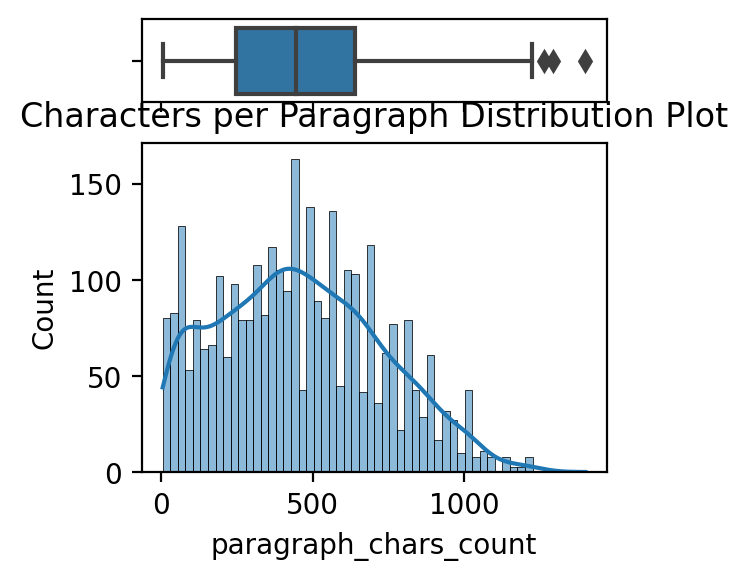

In [16]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

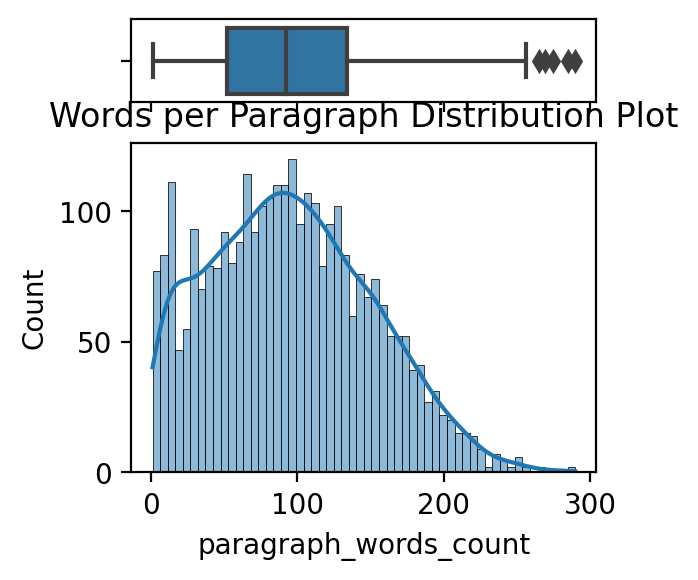

In [17]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Length per Paragraph

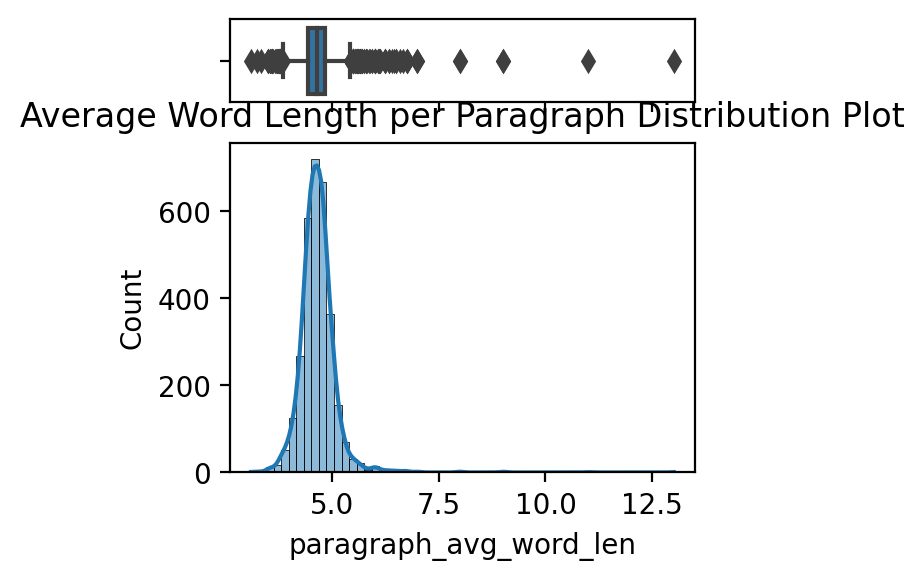

In [18]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [19]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 138 unique stop words


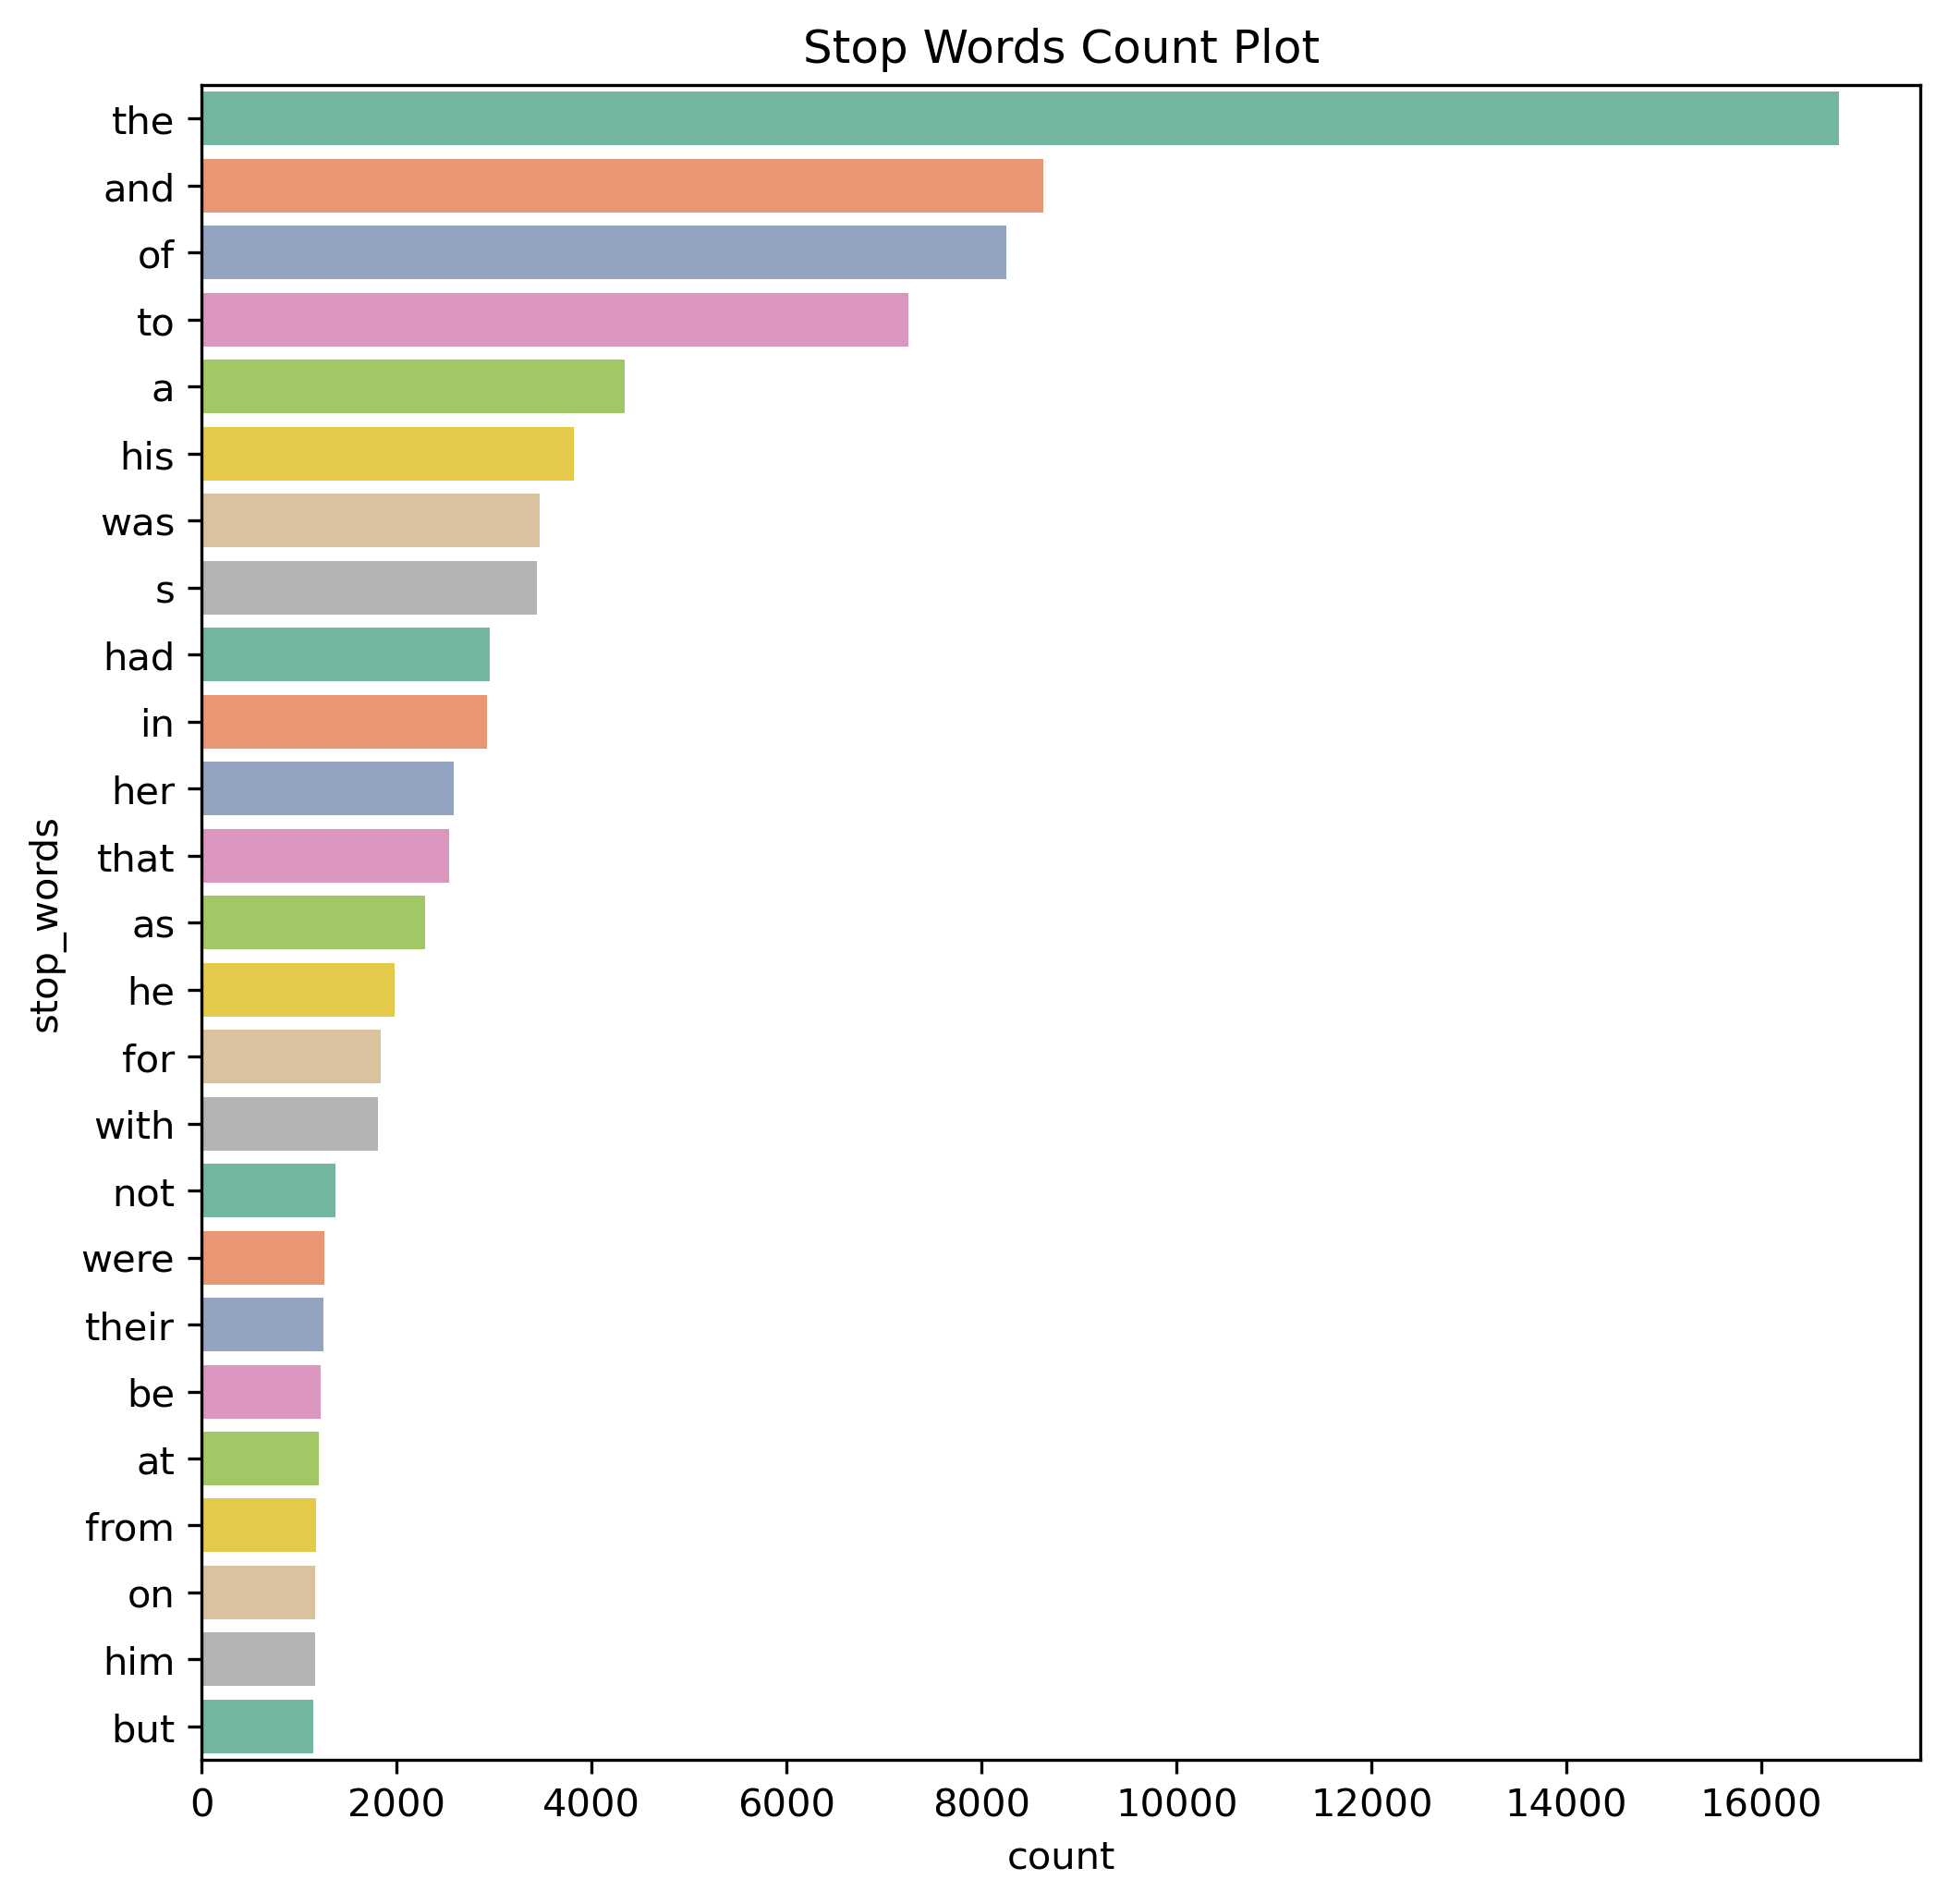

In [20]:
top_k = 25
top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_stop_words(
    top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [21]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 14170 unique non-stop words


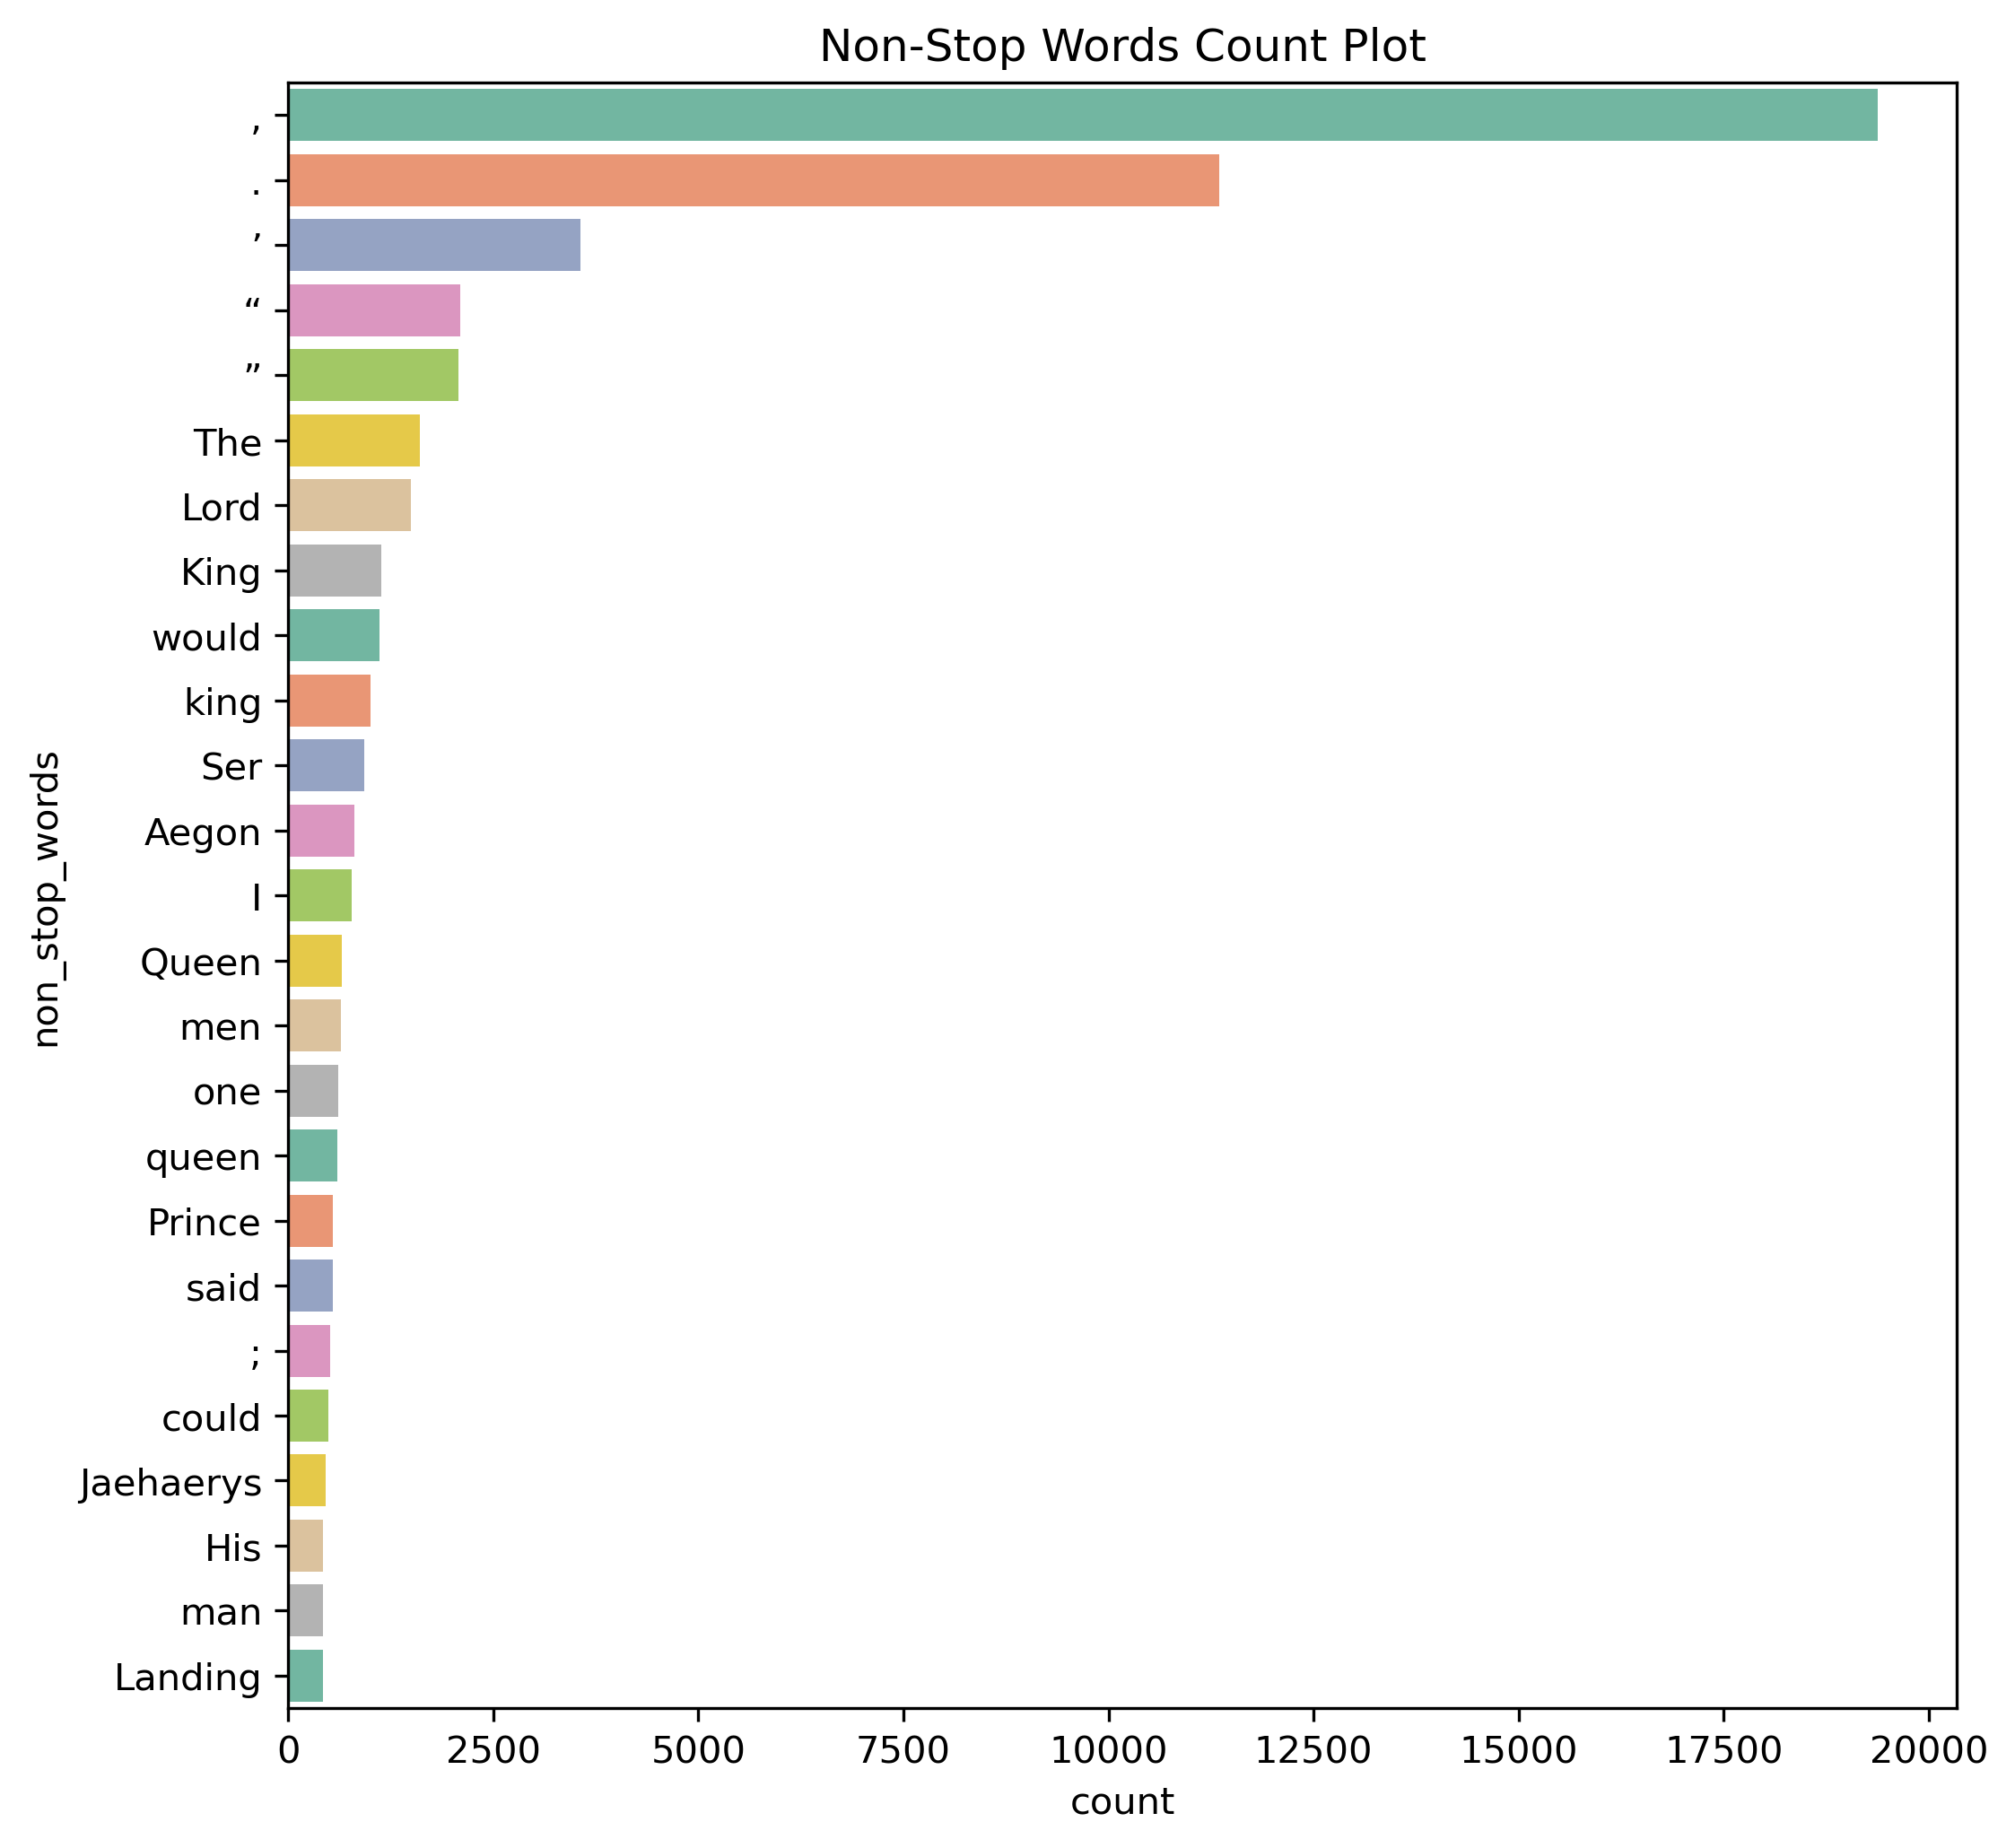

In [22]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [23]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 299335 Bigrams


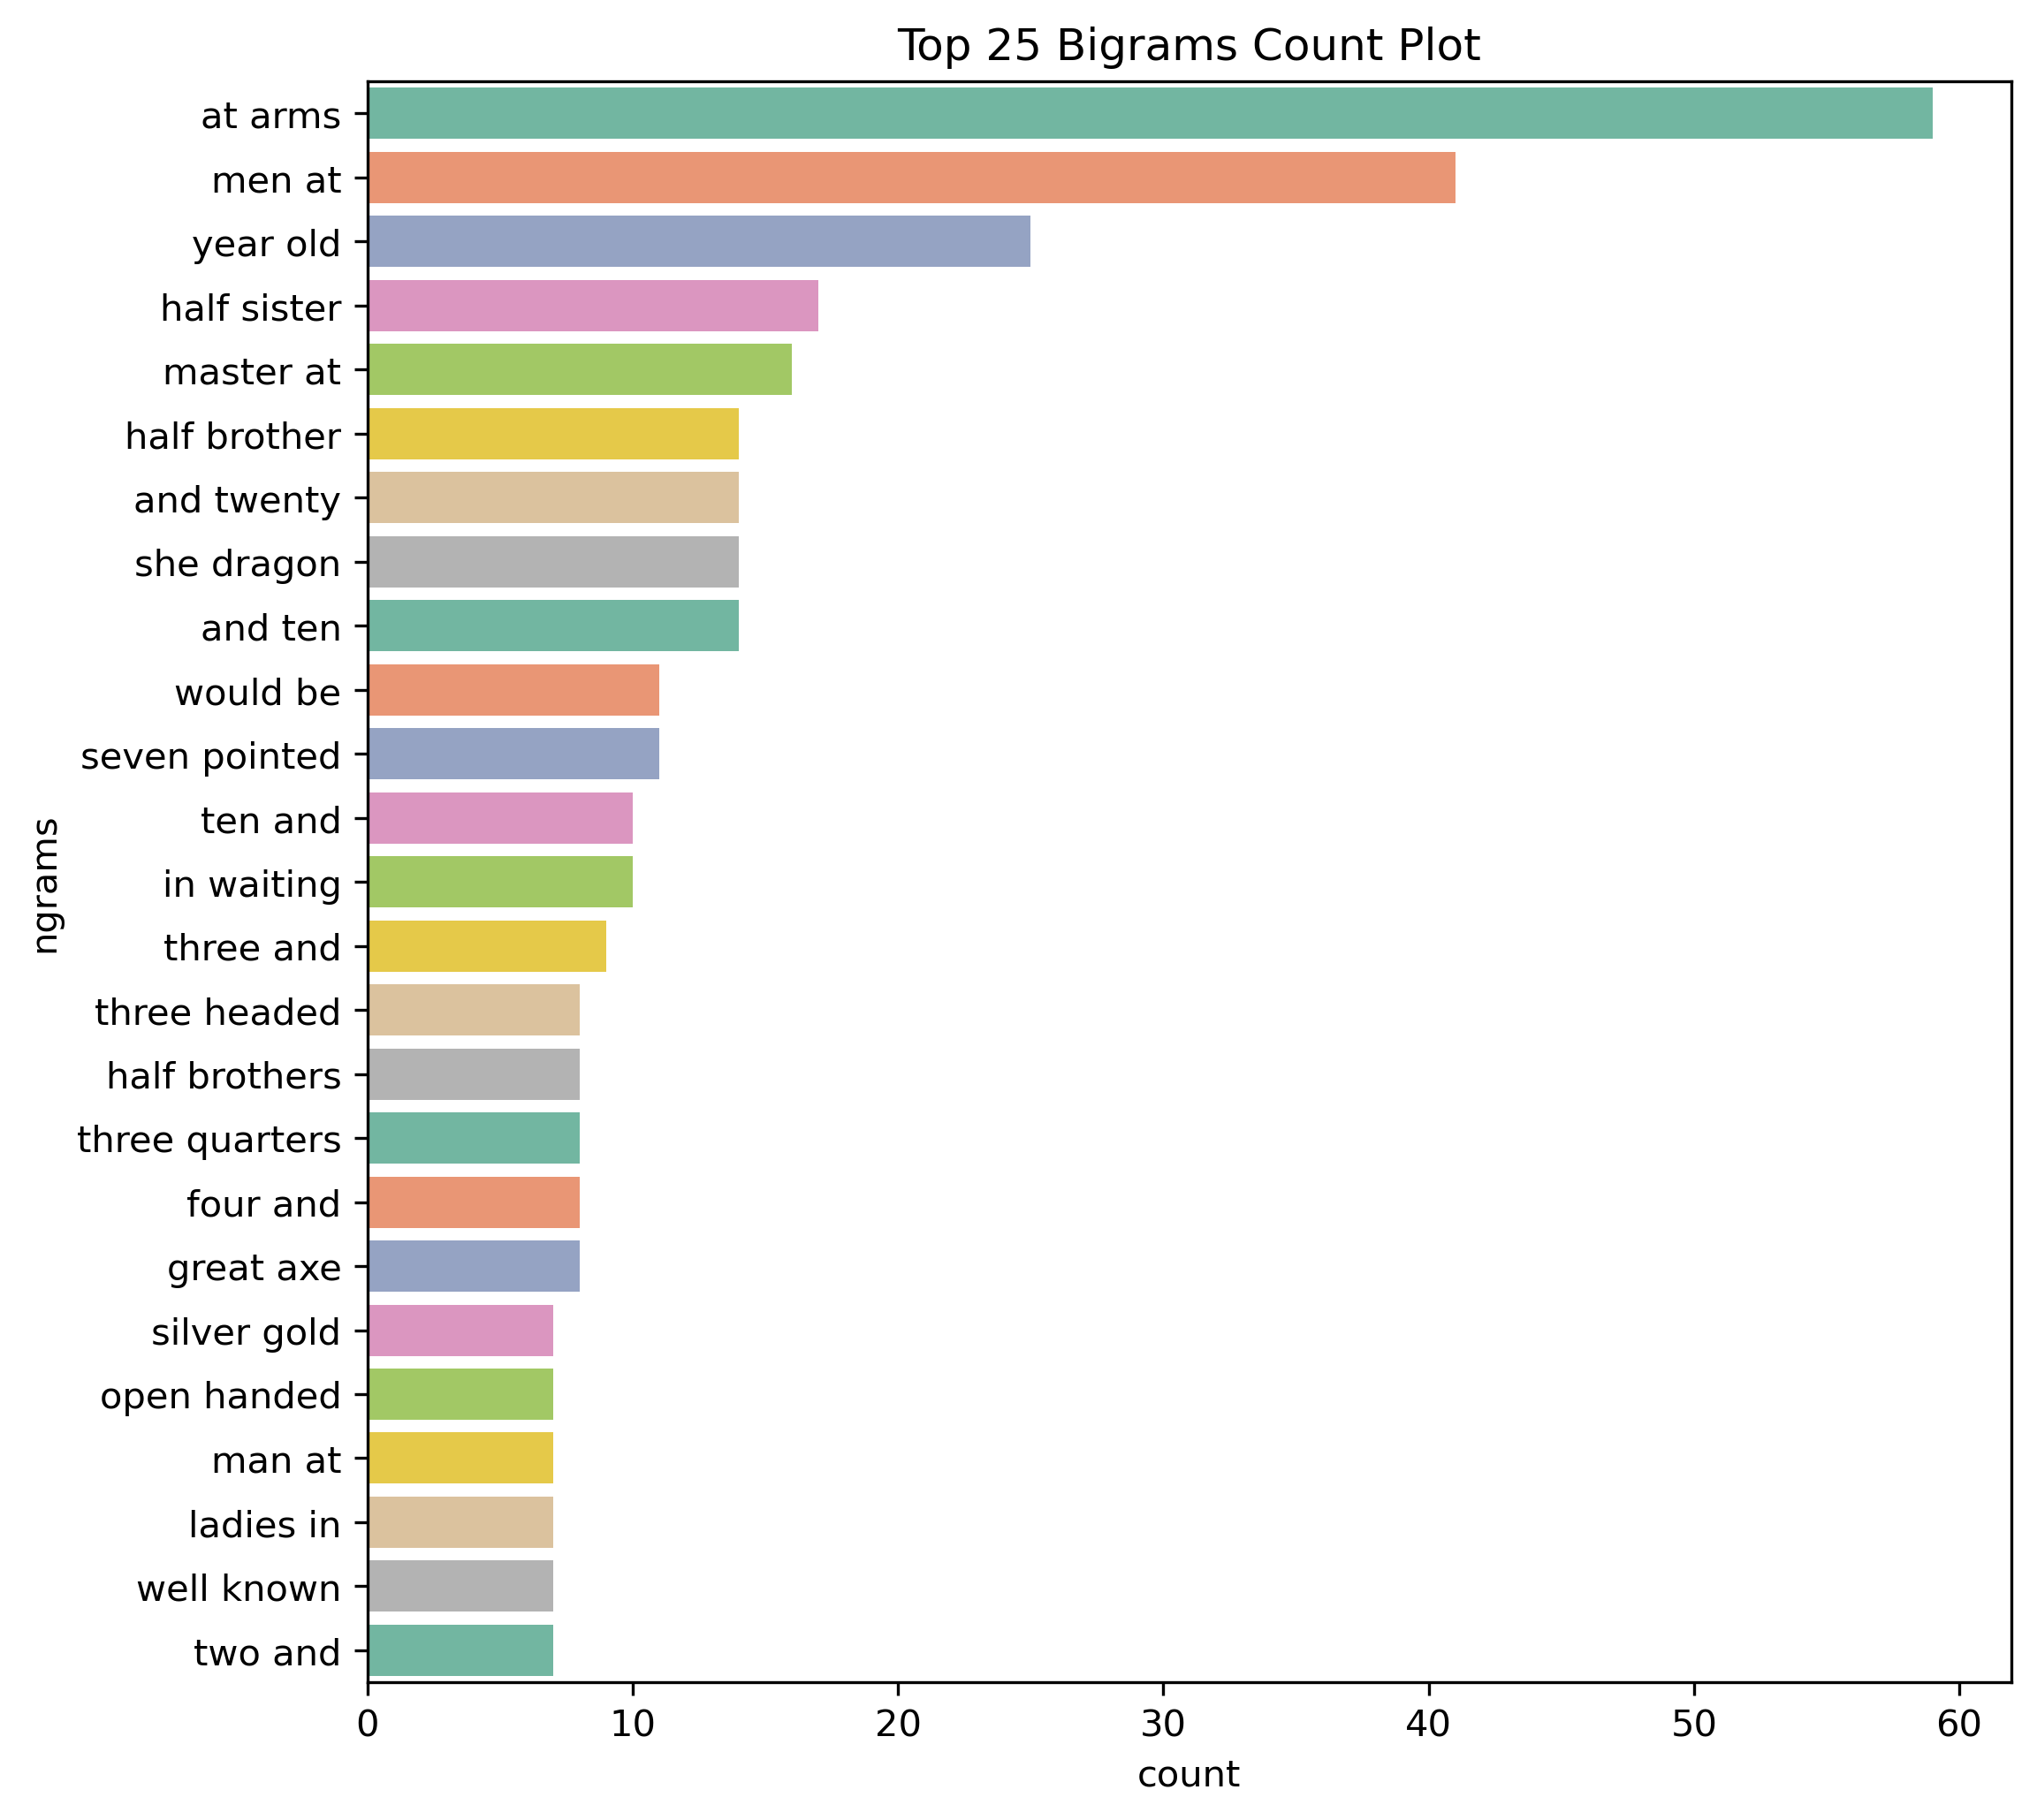

In [24]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [25]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 299334 Trigrams


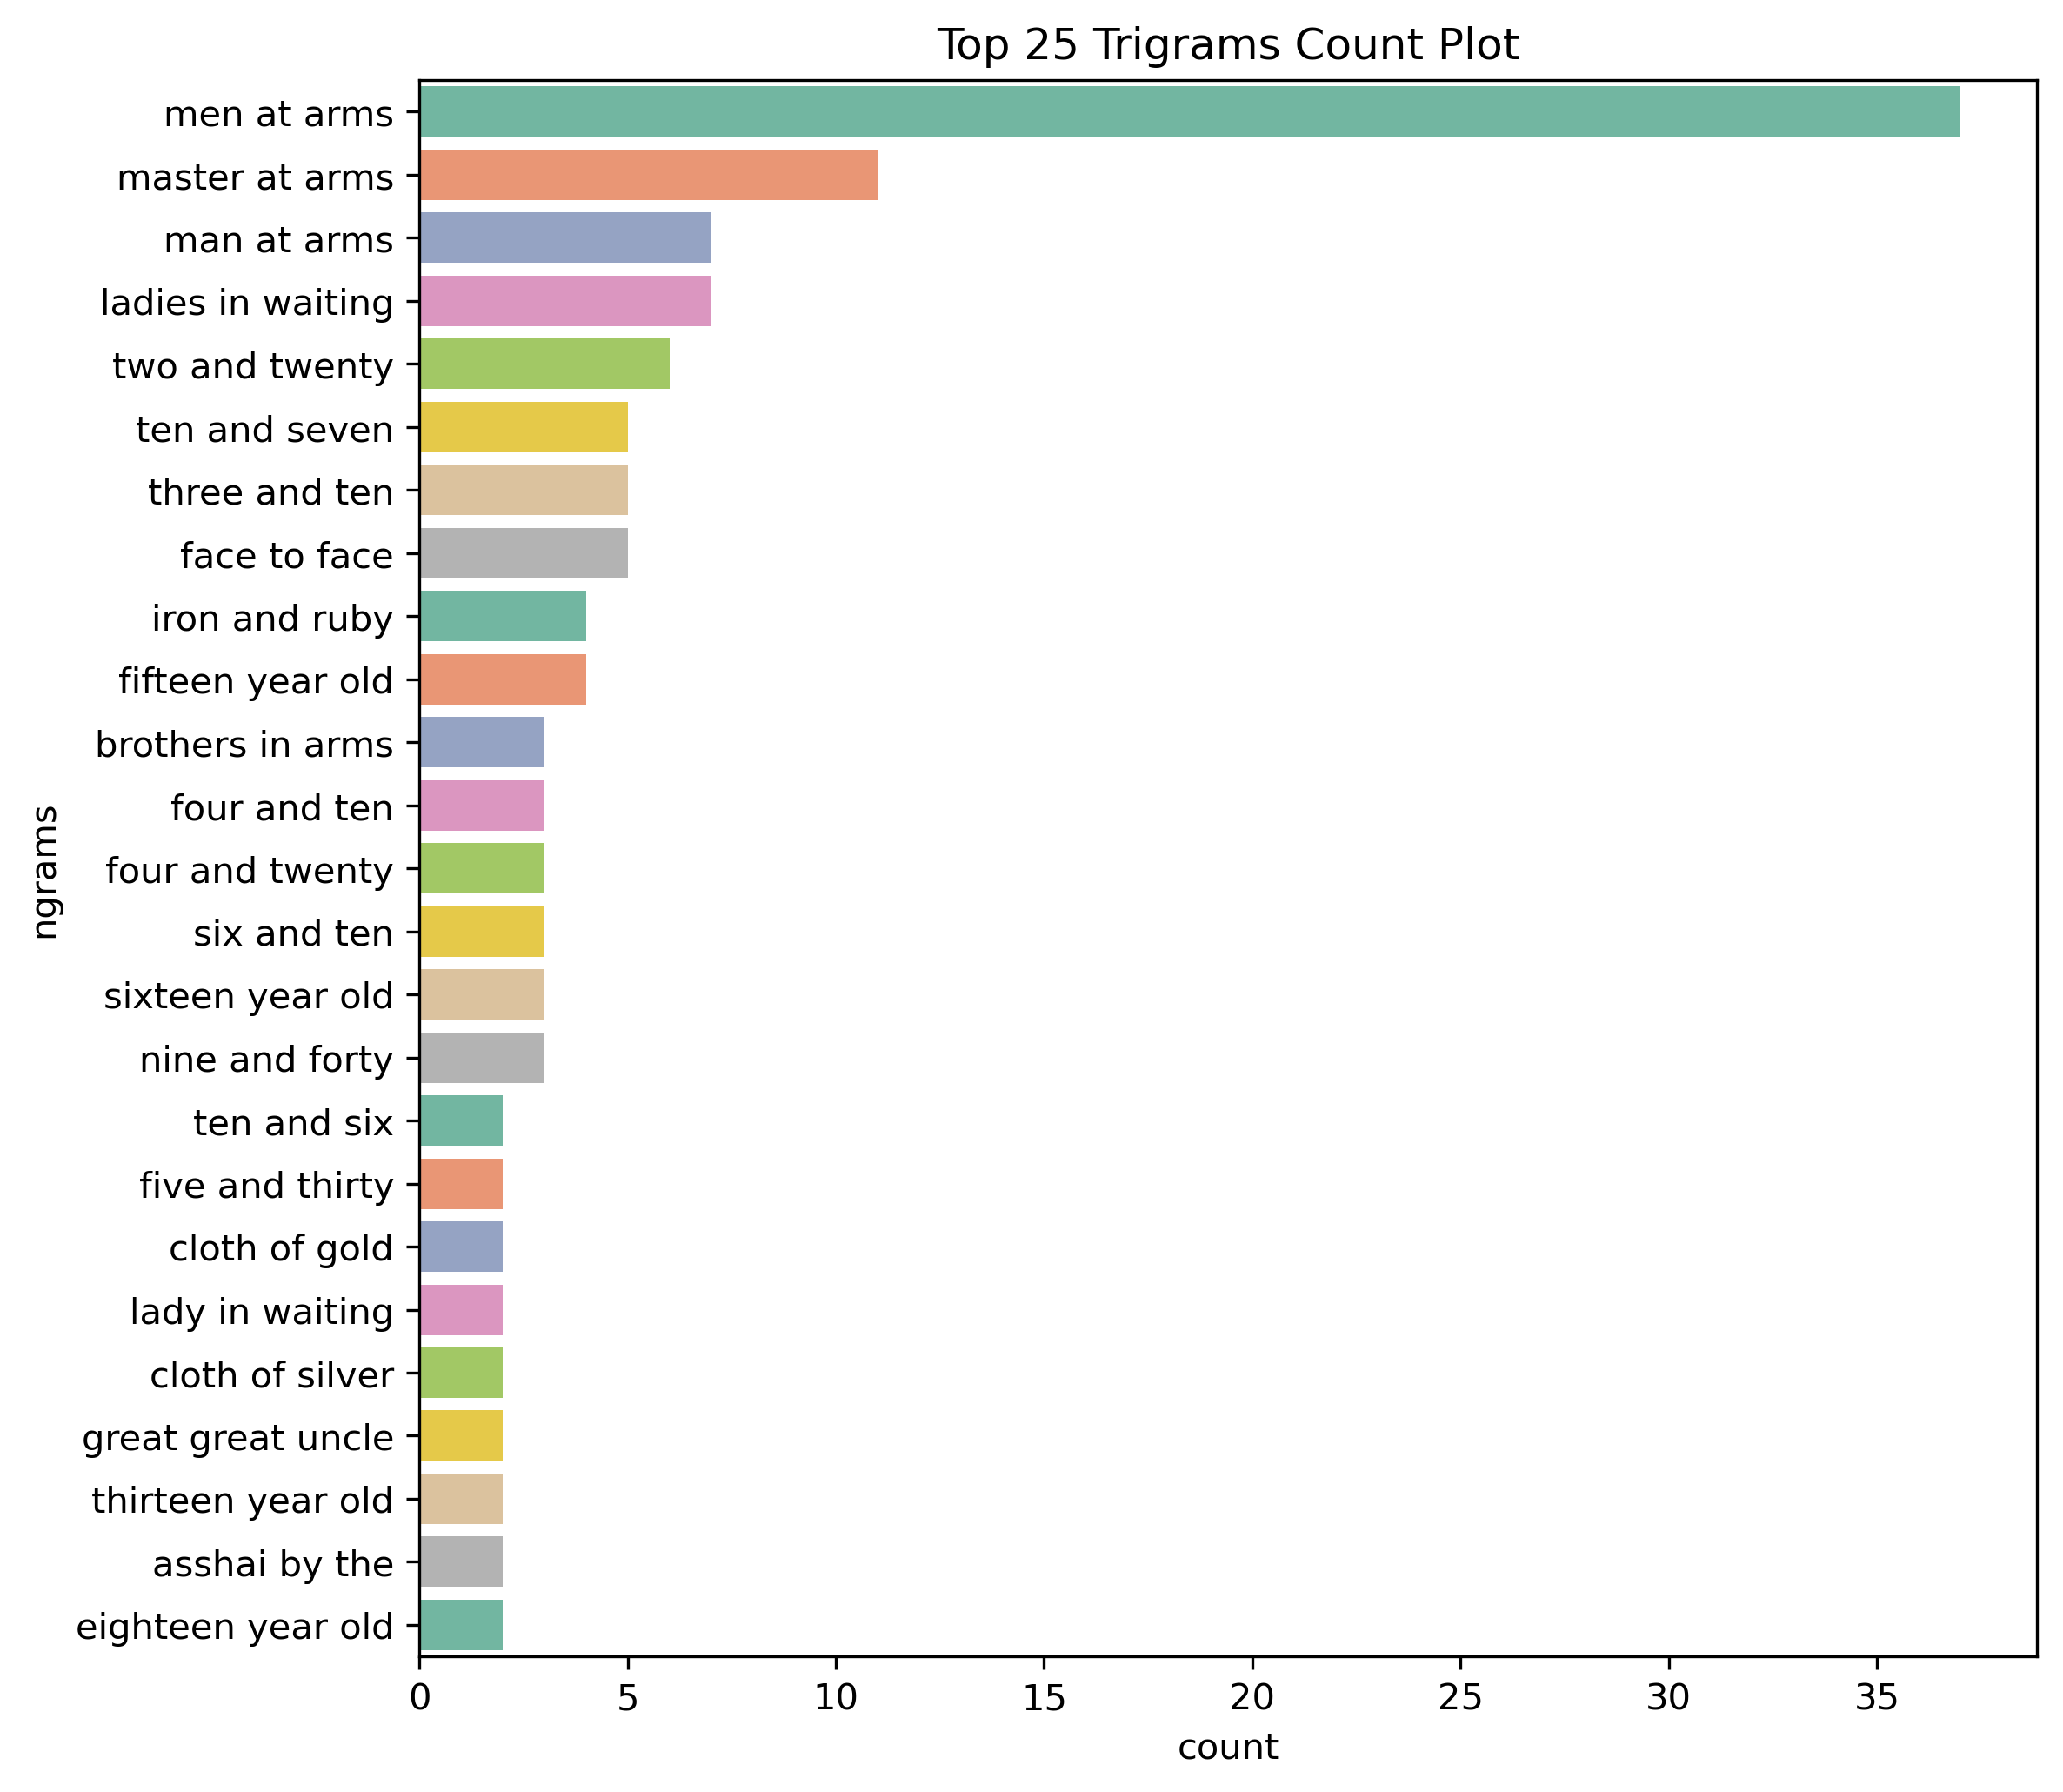

In [26]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, title=f"Top {top_k} Trigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

### Analysis of Cleaned Paragraphs

In [27]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    cleaned_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
['maesters', 'citadel', 'keep', 'history', 'westeros', 'used', 'aegon', '’', 'conquest', 'touchstone', 'past', 'three', 'hundred', 'year', 'birth', 'death', 'battle', 'event', 'dated', 'either', 'ac', 'conquest', 'bc', 'conquest', 'true', 'scholar', 'know', 'dating', 'far', 'precise', 'aegon', 'targaryen', '’', 'conquest', 'seven', 'kingdom', 'take', 'place', 'single', 'day', 'two', 'year', 'passed', 'aegon', '’', 'landing', 'oldtown', 'coronation…and', 'even', 'conquest', 'remained', 'incomplete', 'since', 'dorne', 'remained', 'unsubdued', 'sporadic', 'attempt', 'bring', 'dornishmen', 'realm', 'continued', 'king', 'aegon', '’', 'reign', 'well', 'reign', 'son', 'making', 'impossible', 'fix', 'precise', 'end', 'date', 'war', 'conquest', 'even', 'start', 'date', 'matter', 'misconception', 'many', 'assume', 'wrongly', 'reign', 'king', 'aegon', 'targaryen', 'began', 'day', 'landed', 'mouth', 'blackwater', 'rush', 'beneath', 'three', 'hill', 'c

#### Histogram of Paragraph Lengths

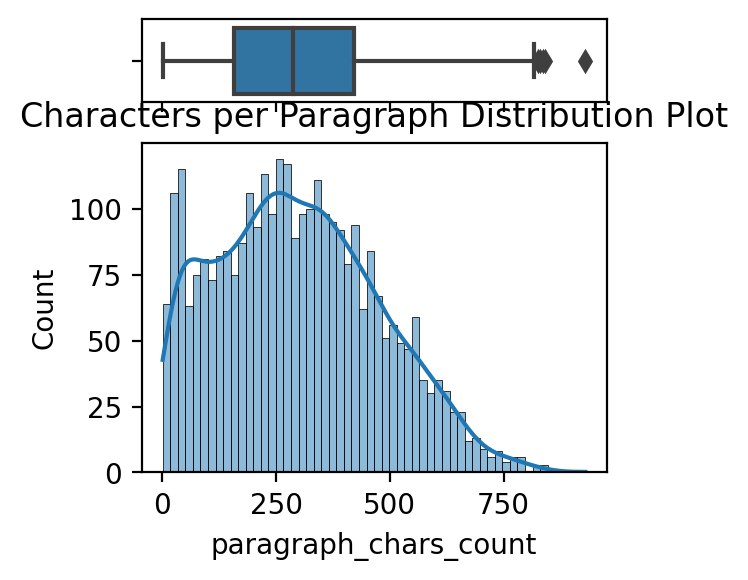

In [28]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

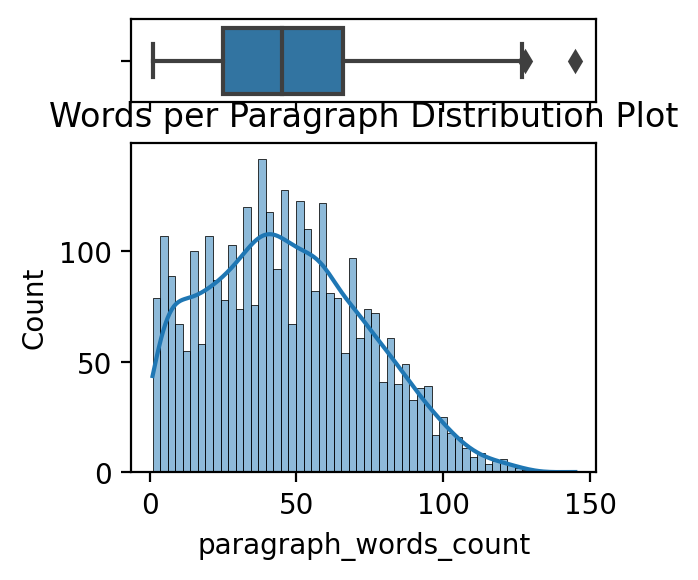

In [29]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Lenghth per Paragraph

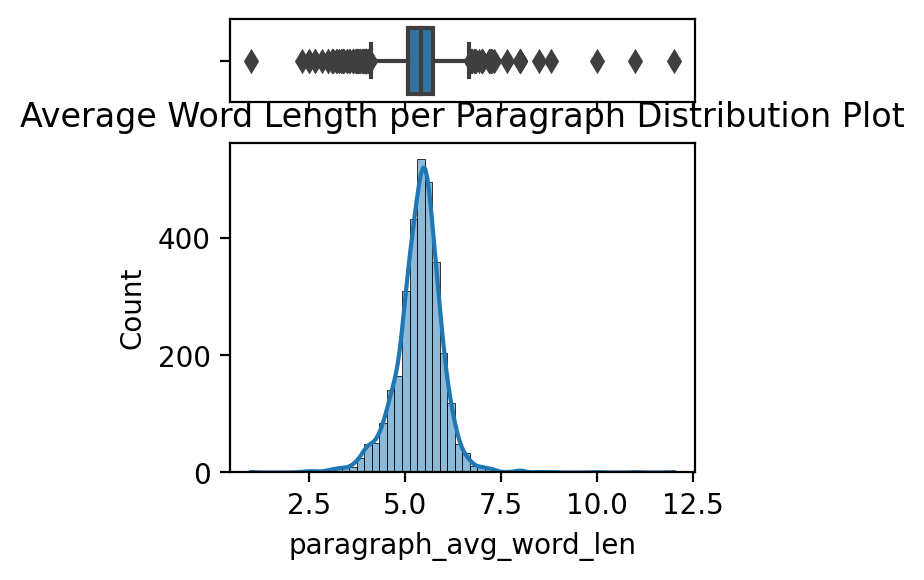

In [30]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [31]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 1 unique stop words


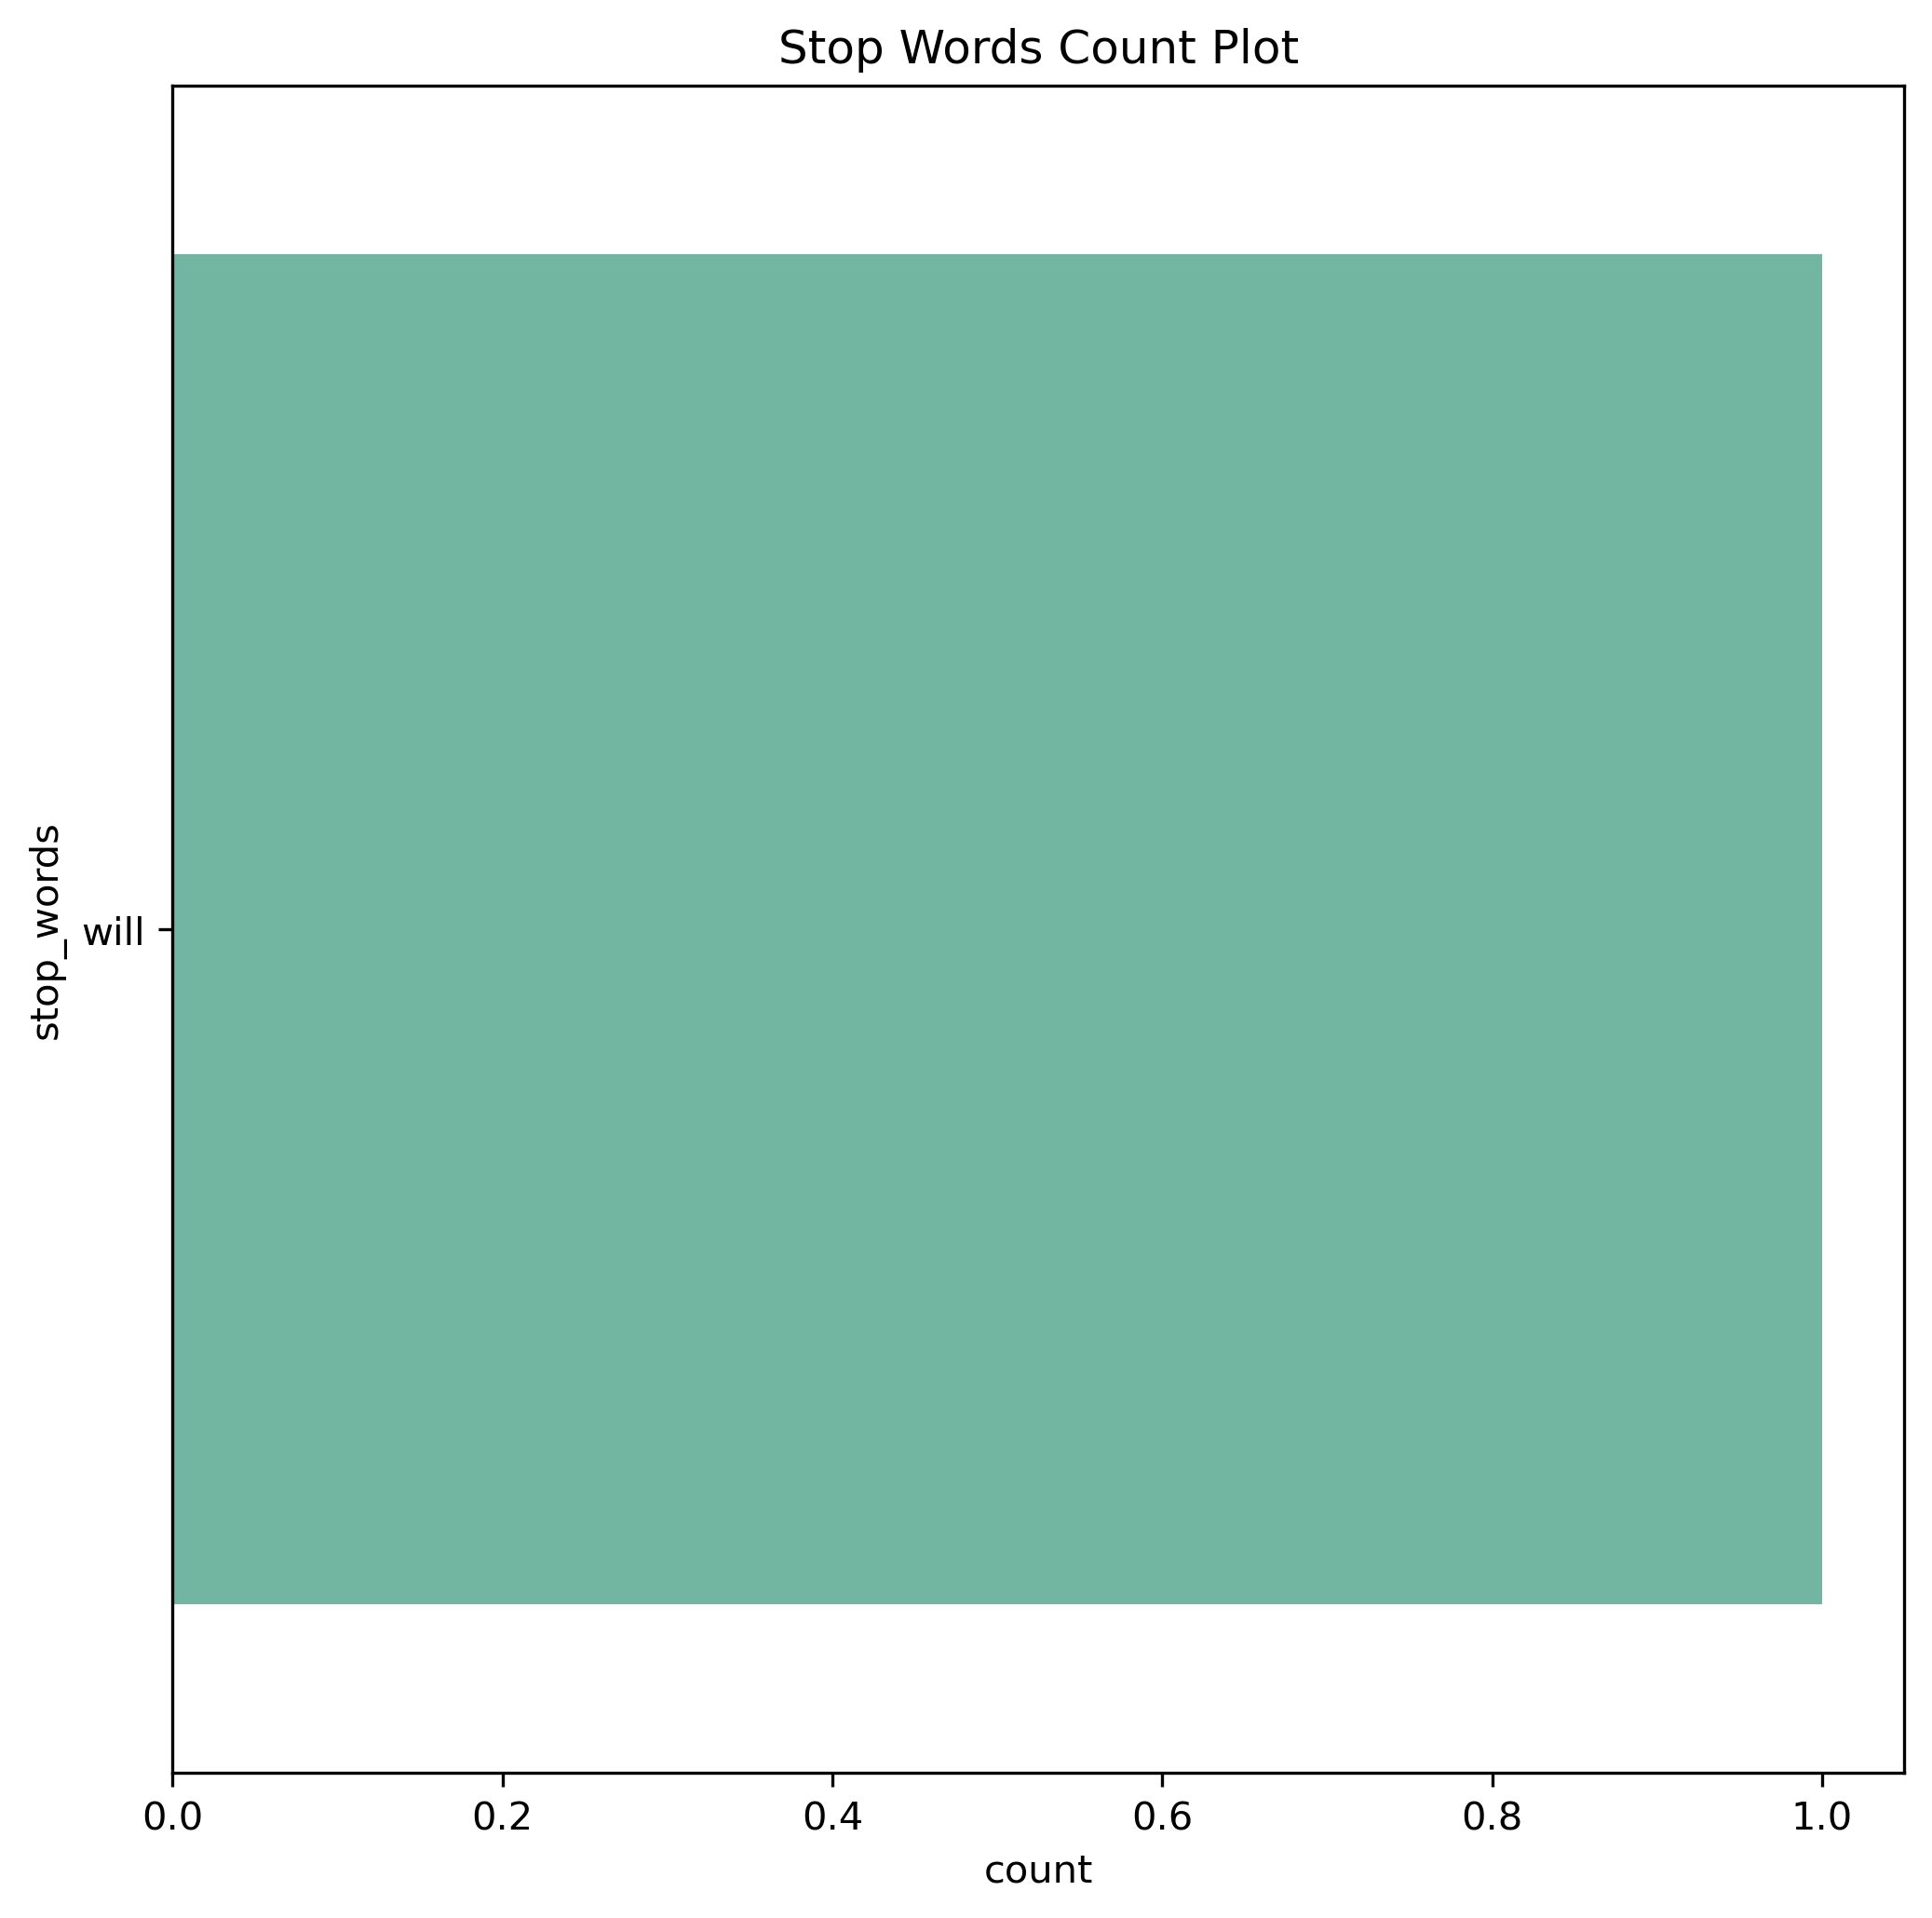

In [32]:
top_k = 25
top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_stop_words(
    top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [33]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 10888 unique non-stop words


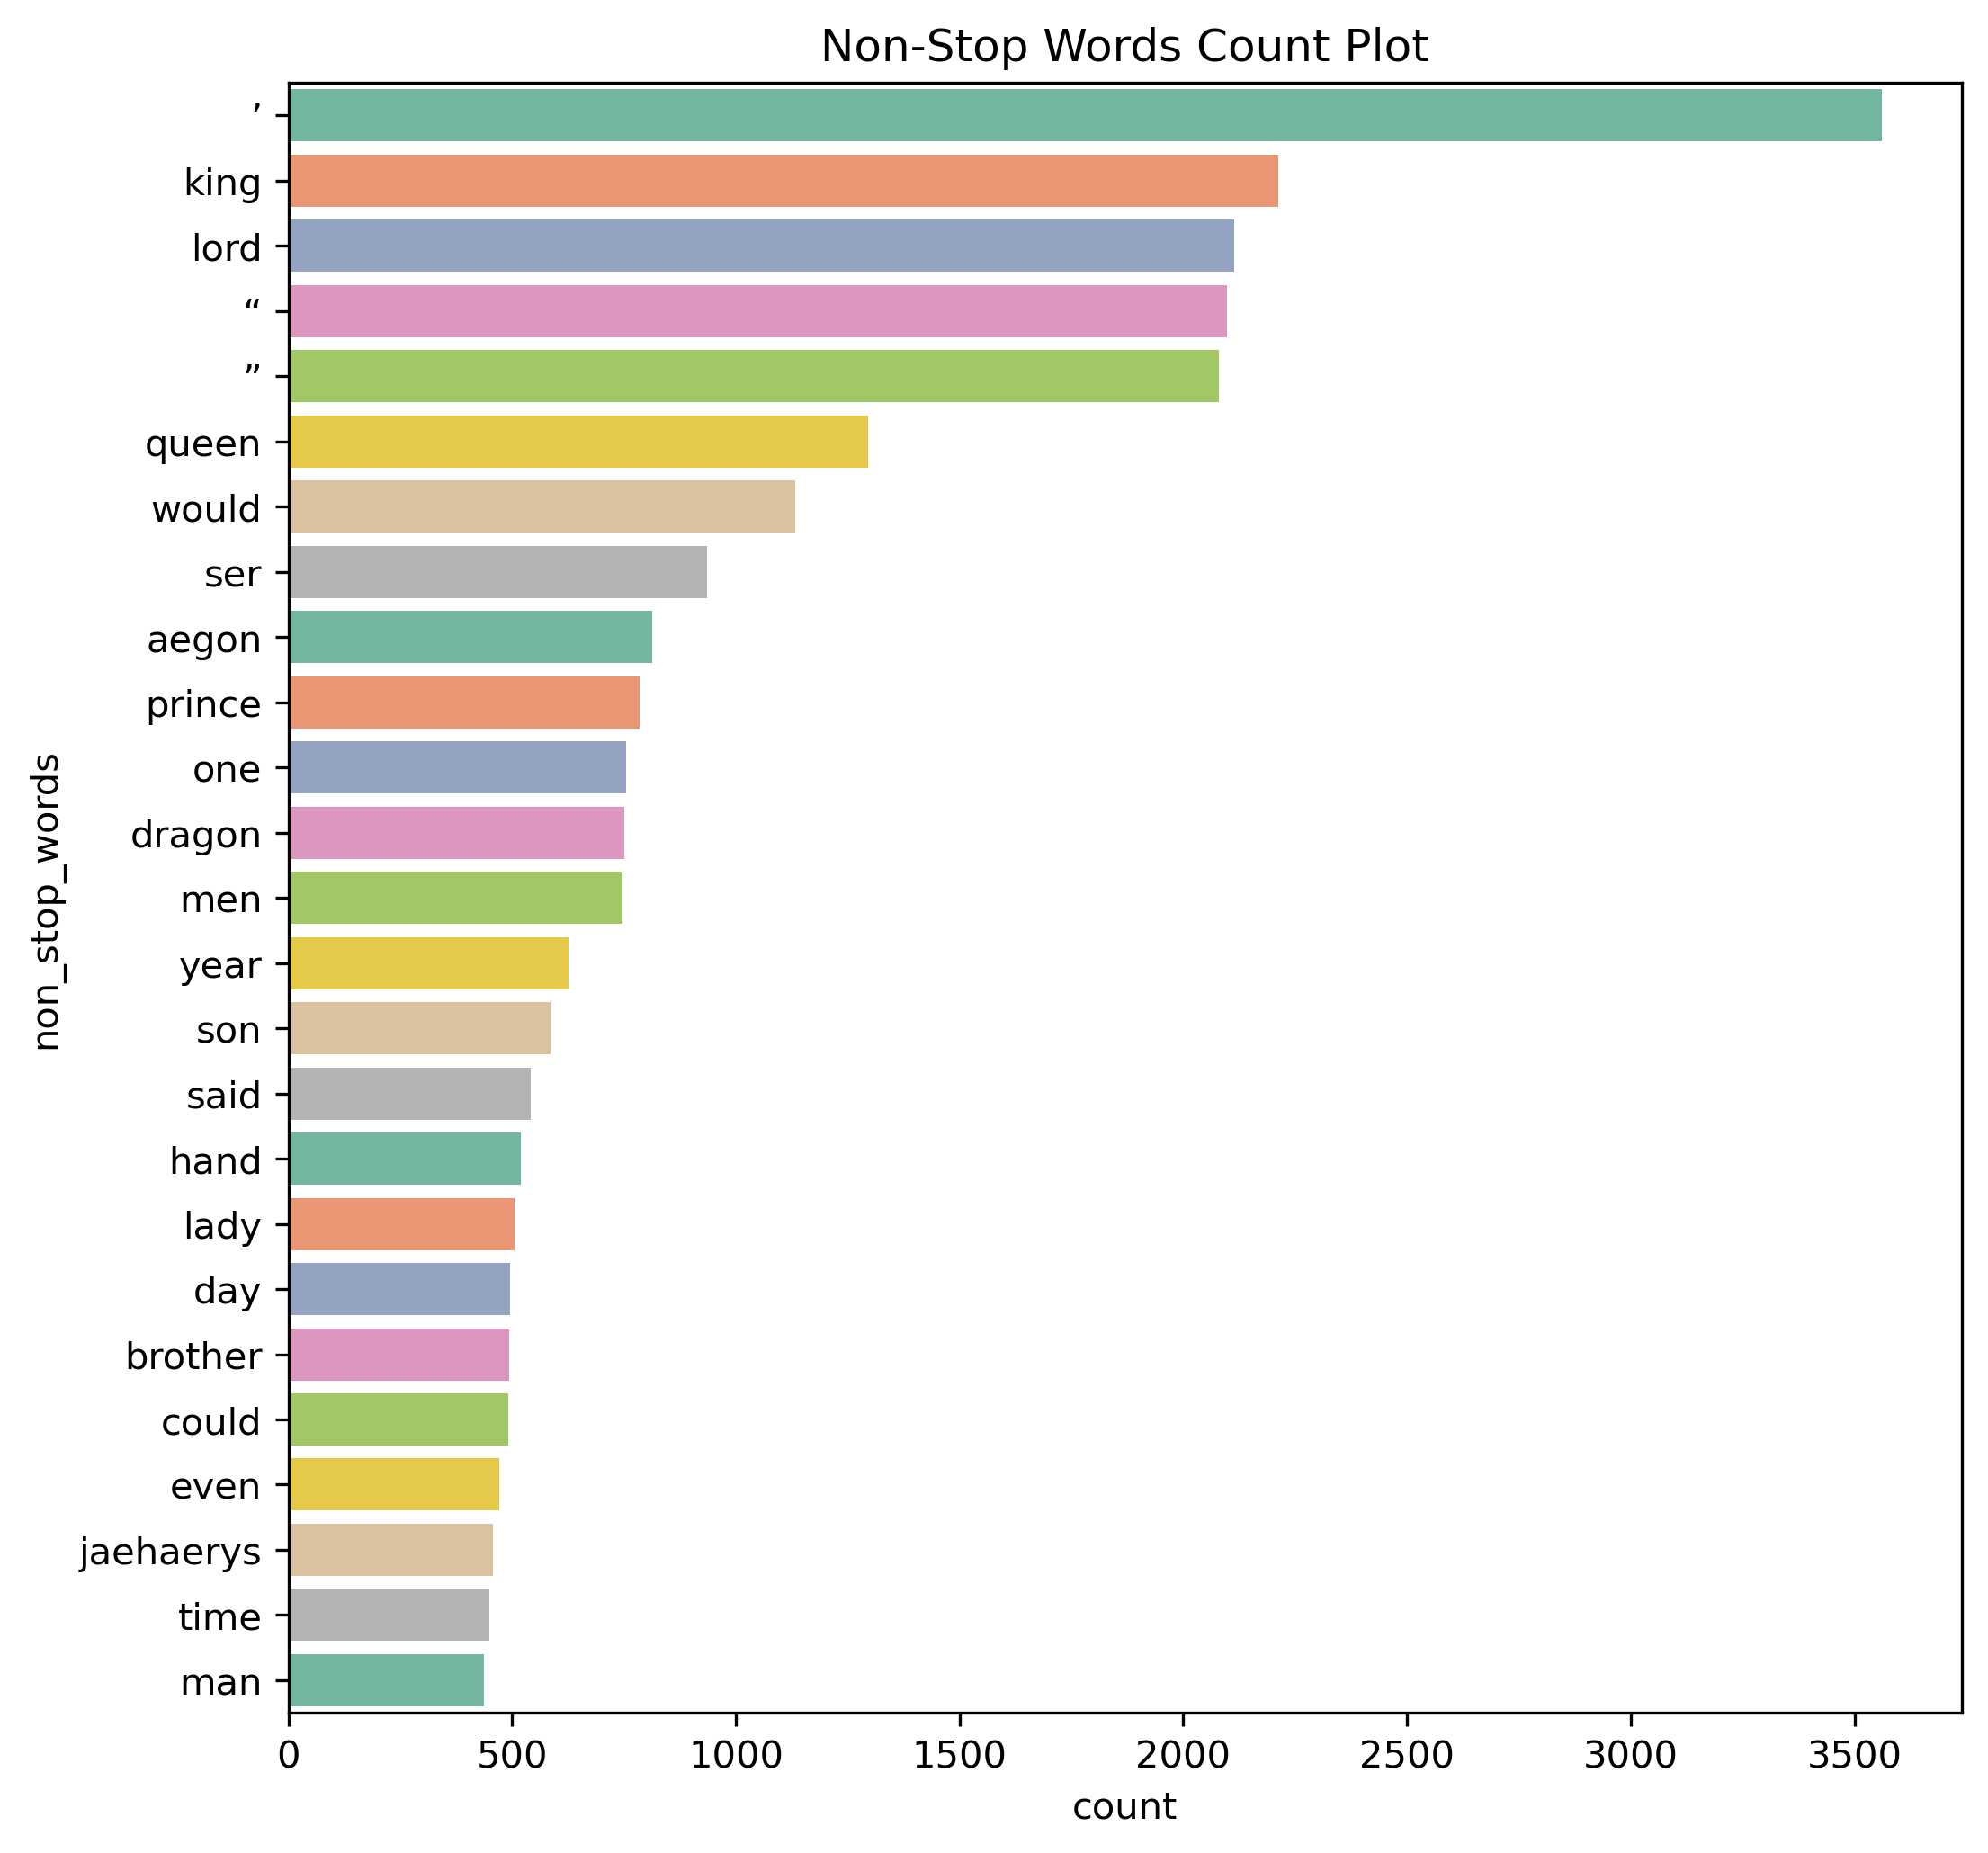

In [34]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [35]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 145722 Bigrams


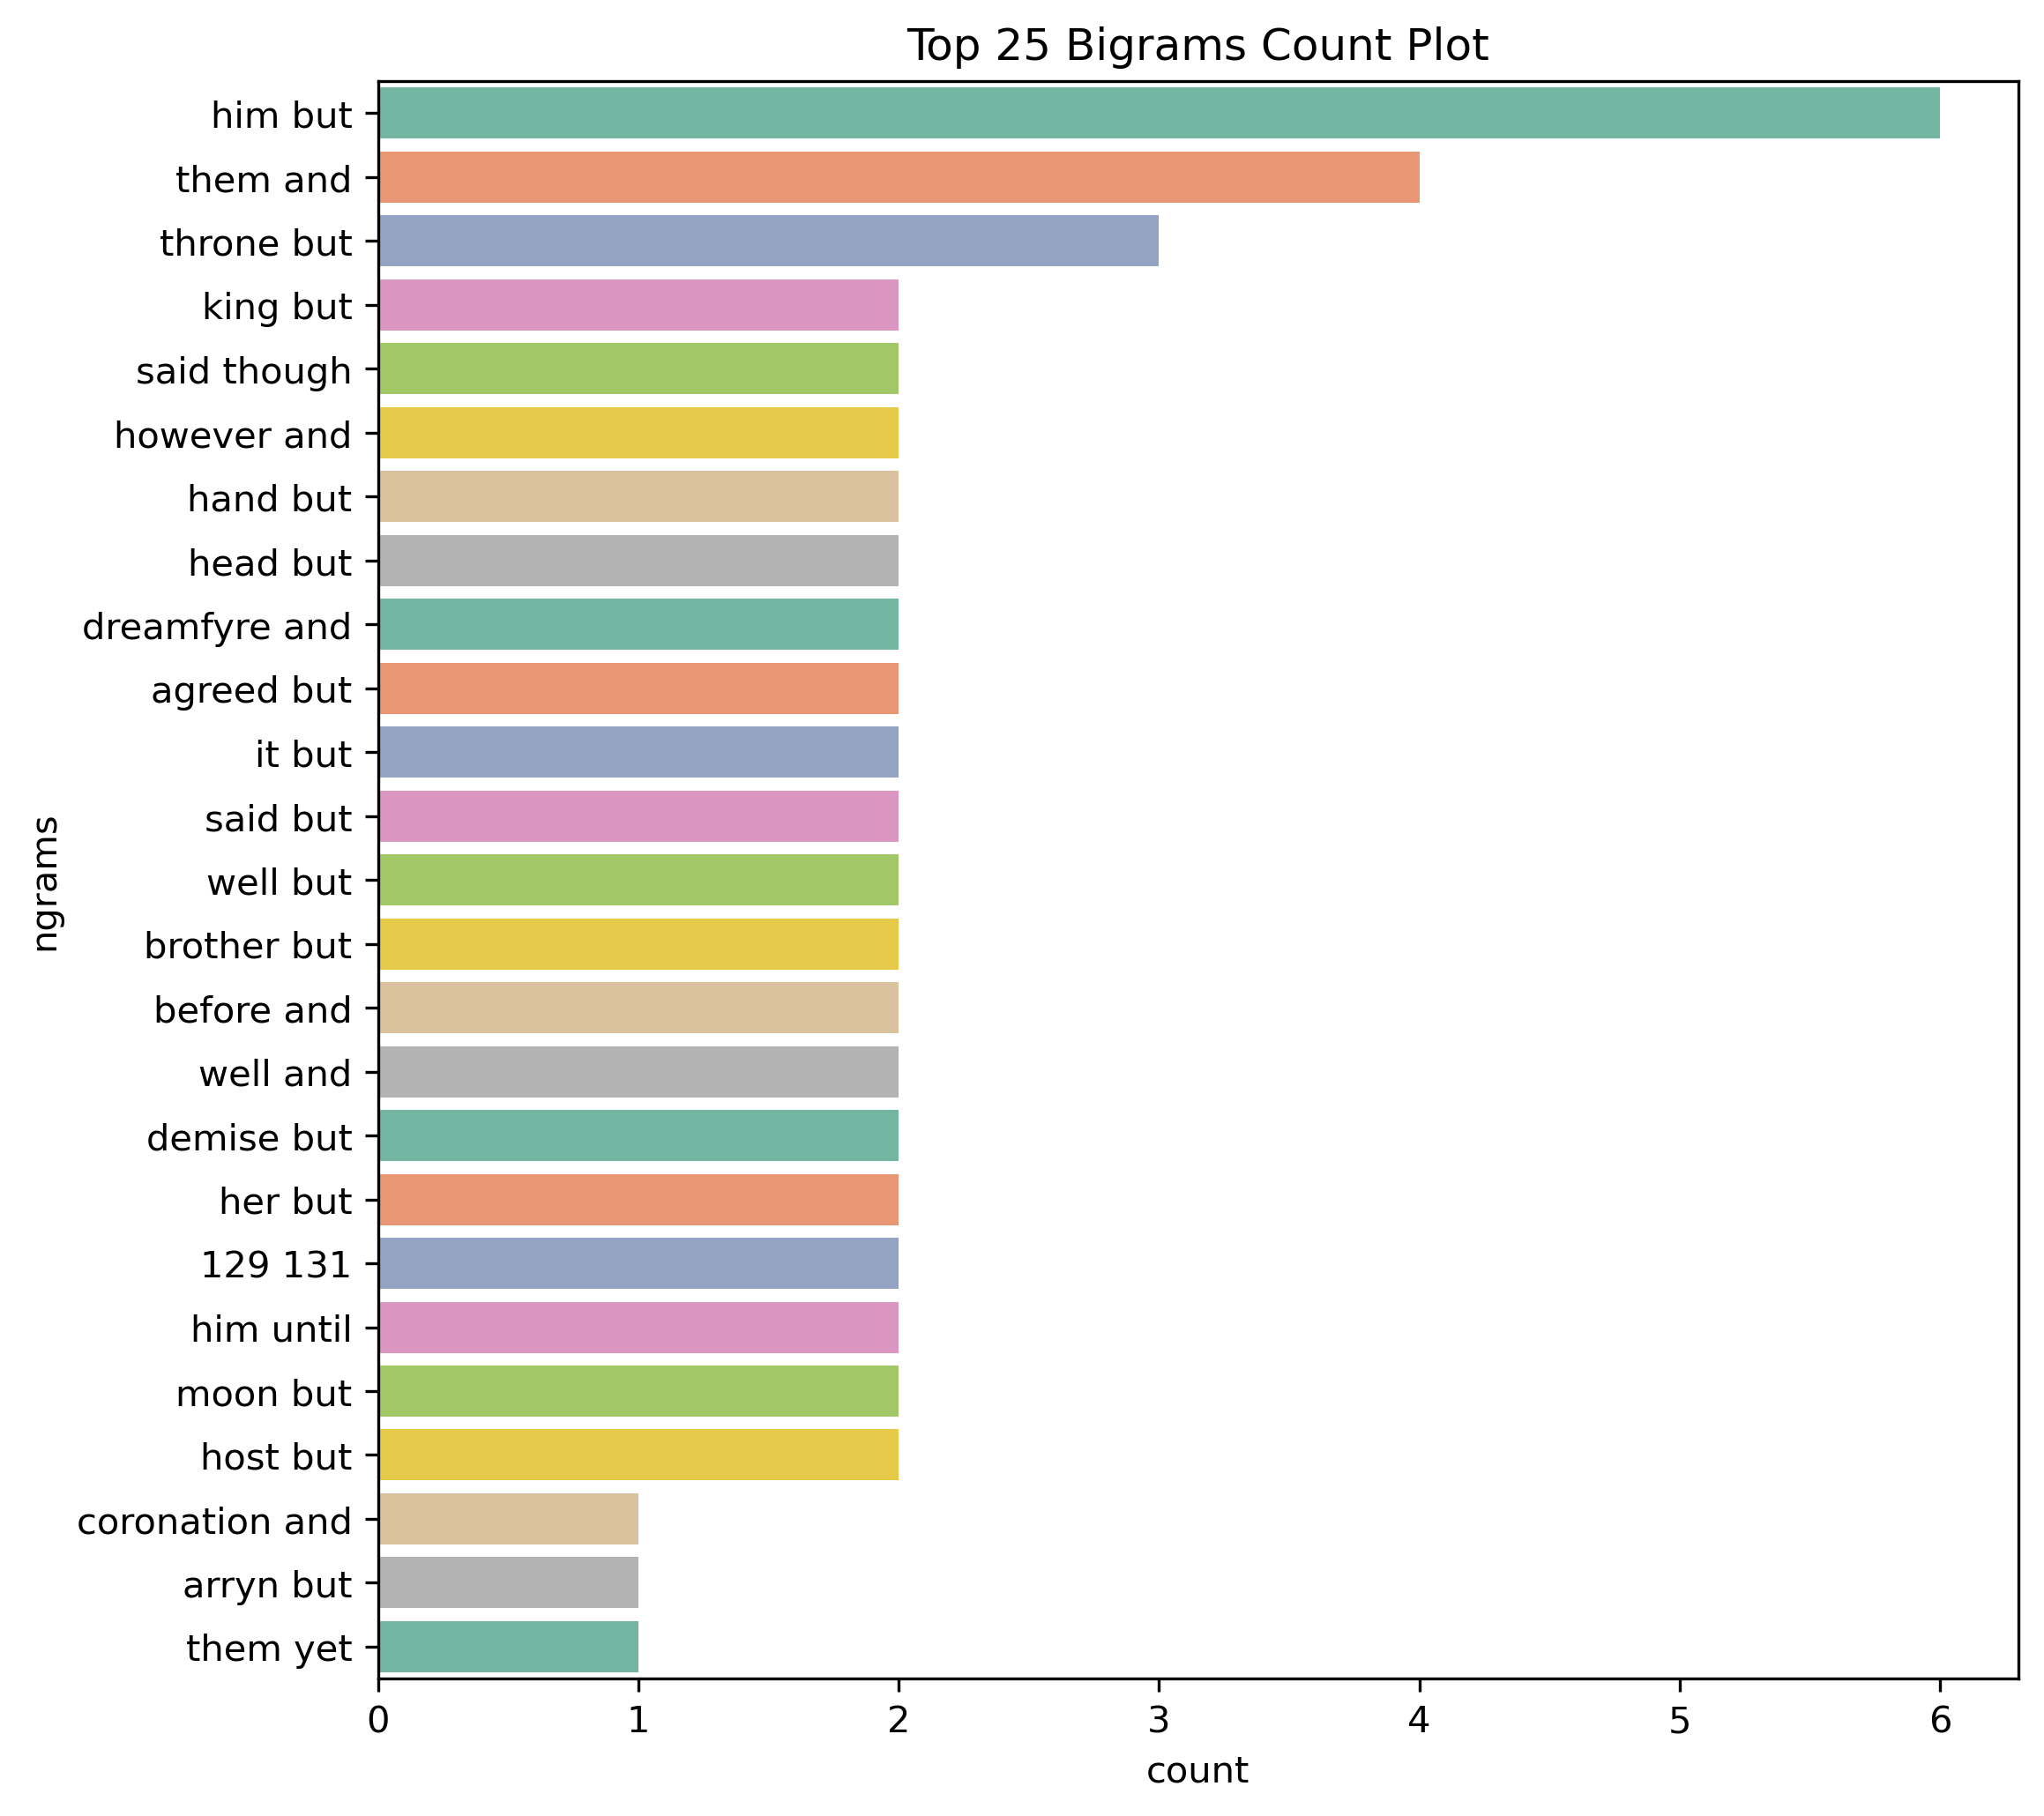

In [36]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [37]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 145721 Trigrams


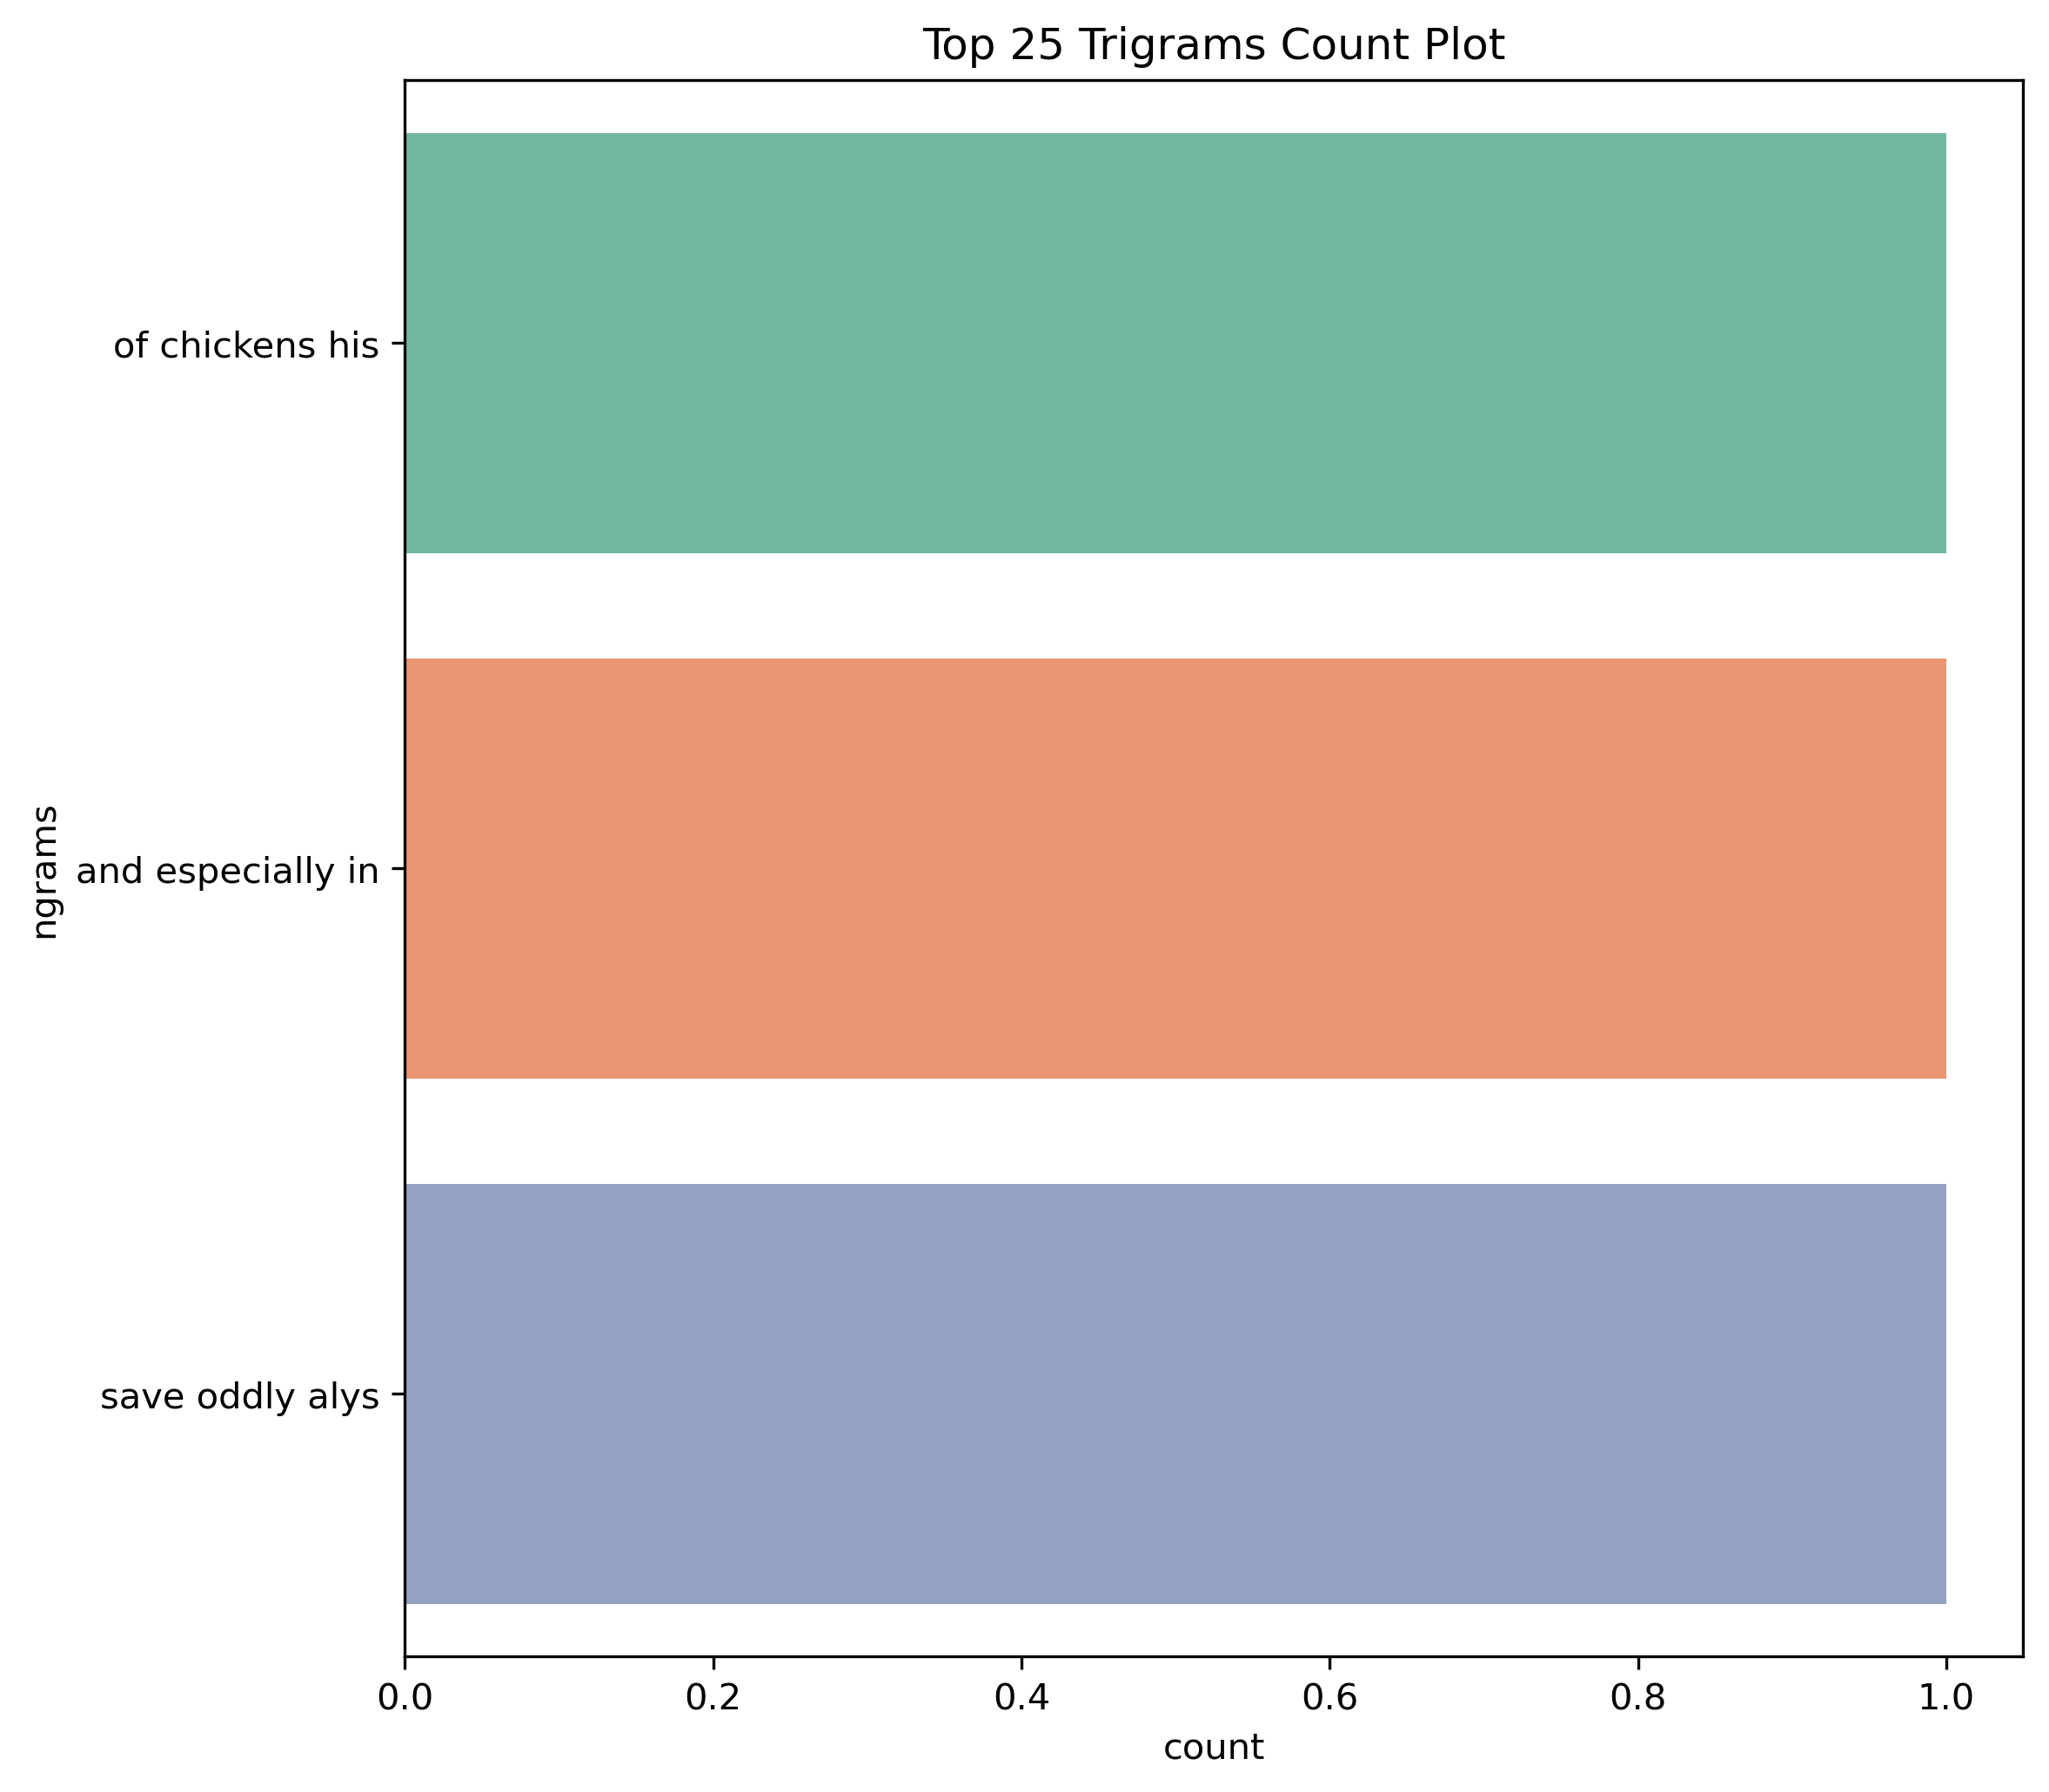

In [38]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, title=f"Top {top_k} Trigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)